<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction to Data Science
    <div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
    @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bonus, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error, r2_score



## Data preparation

In [2]:
# YOUR CODE HERE (OPTION) 
movie_df = pd.read_csv('./../data/processed.csv')
movie_df

,Name,Released year,Genre,Director,Runtime (h),Score,Status,Language,Budget ($),Revenue ($)
0,Fast X,2023,"'Action', 'Crime', 'Thriller'",Dan Mazeau,2.37,72.0,Released,English,340000000.0,704709660.0
1,Trolls Band Together,2023,"'Animation', 'Family', 'Music', 'Fantasy', 'Co...",Thomas Dam,1.53,72.0,Released,English,95000000.0,173800000.0
2,Robot Apocalypse,2021,"'Science Fiction', 'Action'",Marcus Friedlander,1.45,21.0,Released,English,NaN,NaN
3,Five Nights at Freddy's,2023,"'Horror', 'Mystery'",Emma Tammi,1.83,78.0,Released,English,20000000.0,286700000.0
4,Oppenheimer,2023,"'Drama', 'History'",Christopher Nolan,3.02,81.0,Released,English,100000000.0,951000000.0
...,...,...,...,...,...,...,...,...,...,...
4995,Secret in Their Eyes,2015,"'Thriller', 'Mystery', 'Drama', 'Crime'",Billy Ray,1.85,64.0,Released,English,19500000.0,34854990.0
4996,The Vatican Tapes,2015,"'Thriller', 'Horror'",Mark Neveldine,1.52,53.0,Released,English,13000000.0,1784763.0
4997,Song to Song,2017,"'Romance', 'Drama', 'Music'",Terrence Malick,2.15,55.0,Released,English,10000000.0,1710528.0
4998,Divine Intervention,2023,'Comedy',Pedro Pablo Ibarra,1.67,82.0,Released,Spanish; Castilian,NaN,NaN


## Feature engineering

In [3]:
# YOUR CODE HERE (OPTION) 
df = movie_df[['Genre', 'Runtime (h)', 'Score', 'Language', 'Budget ($)', 'Revenue ($)']].dropna()

one_hot_df = pd.DataFrame()
def splitGenre(s):
    return s.split(', ')
genre_stack = df['Genre'].apply(splitGenre).agg(pd.Series).stack().agg(pd.Series).stack()
genre_dummy = pd.get_dummies(genre_stack).groupby(level = 0).sum()
genre_dummy.columns = ['Genre_' + col.replace("'", "") for col in genre_dummy.columns]
df = pd.concat([genre_dummy, df], axis = 1)

label_encoder=LabelEncoder()
df['Language_encoded'] = label_encoder.fit_transform(df['Language'])

df = df.drop(['Genre', 'Language'], axis=1)

df

,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,Genre_Drama,Genre_Family,Genre_Fantasy,Genre_History,Genre_Horror,...,Genre_Science Fiction,Genre_TV Movie,Genre_Thriller,Genre_War,Genre_Western,Runtime (h),Score,Budget ($),Revenue ($),Language_encoded
0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,2.37,72.0,340000000.0,704709660.0,5
1,0,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,1.53,72.0,95000000.0,173800000.0,5
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1.83,78.0,20000000.0,286700000.0,5
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,3.02,81.0,100000000.0,951000000.0,5
7,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1.80,65.0,40000000.0,8000000.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4990,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1.62,56.0,9000000.0,146863.0,5
4992,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1.85,67.0,23000000.0,19652638.0,5
4995,0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,1.85,64.0,19500000.0,34854990.0,5
4996,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1.52,53.0,13000000.0,1784763.0,5


## Preparation

In [4]:
X = df.drop(['Revenue ($)'], axis=1)  # Features
y = df['Revenue ($)']  # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training model

In [5]:
# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Train the Lasso Regression model
lasso_model = Lasso(alpha=1.0, random_state=42)  # You can adjust the alpha (regularization strength) parameter
lasso_model.fit(X_train, y_train)

Lasso(random_state=42)

## Prediction

In [6]:
y_pred_lr = linear_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_lasso = lasso_model.predict(X_test)

## Evaluation

In [7]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("== Linear Regression for Revenue Prediction ==")
print("Mean Squared Error (MSE):", mse_lr)
print("R-squared (R2):", r2_lr)

print("== Decision Tree Regressor for Revenue Prediction ==")
print("Mean Squared Error (MSE):", mse_dt)
print("R-squared (R2):", r2_dt)

print("== Random Forest Regressor for Revenue Prediction ==")
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

print("== Lasso Regression for Revenue Prediction ==")
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R2):", r2_lasso)

== Linear Regression for Revenue Prediction ==
Mean Squared Error (MSE): 2.83424874403391e+16
R-squared (R2): 0.5177469207267639
== Decision Tree Regressor for Revenue Prediction ==
Mean Squared Error (MSE): 4.4842849812369944e+16
R-squared (R2): 0.23698996247508164
== Random Forest Regressor for Revenue Prediction ==
Mean Squared Error (MSE): 3.0607671223509524e+16
R-squared (R2): 0.4792043666600745
== Lasso Regression for Revenue Prediction ==
Mean Squared Error (MSE): 2.834248732964145e+16
R-squared (R2): 0.5177469226103065


## Results analysis

## Linear

In [8]:
param_grid_linear = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}
# Create the Linear Regression model
linear_model = LinearRegression()

# Create the GridSearchCV object
grid_search_linear = GridSearchCV(linear_model, param_grid_linear, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_linear.fit(X_train, y_train)

# Get the best hyperparameters
best_params_linear = grid_search_linear.best_params_

# Train the model with the best hyperparameters
start_time = time.time()
linear_model.set_params(**best_params_linear)
linear_model.fit(X_train, y_train)
end_time = time.time()
training_time_linear = end_time - start_time

# Predictions
start_time = time.time()
y_pred_linear = linear_model.predict(X_test)
end_time = time.time()
prediction_time_linear = end_time - start_time
# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

# Display the results
print("== Linear Regression ==")
print("MSE:", mse_linear)
print("R-squared:", r2_linear)
print("Training time:",training_time_linear)
print("Prediction time:",prediction_time_linear)

== Linear Regression ==
MSE: 2.83424874403391e+16
R-squared: 0.5177469207267639
Training time: 0.005945682525634766
Prediction time: 0.0025119781494140625


In [9]:
param_grid_decision_tree = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create the Decision Tree Regressor model
decision_tree_model = DecisionTreeRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_decision_tree = GridSearchCV(decision_tree_model, param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_decision_tree.fit(X_train, y_train)

# Get the best hyperparameters
best_params_decision_tree = grid_search_decision_tree.best_params_

# Train the model with the best hyperparameters
start_time = time.time()
decision_tree_model.set_params(**best_params_decision_tree)
decision_tree_model.fit(X_train, y_train)
end_time = time.time()
training_time_tree = end_time - start_time

# Predictions
start_time = time.time()
y_pred_tree = decision_tree_model.predict(X_test)
end_time = time.time()
prediction_time_tree = end_time - start_time

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)
# Display the results
print("== Decision Tree Regressor ==")
print("MSE:", mse_tree)
print("R-squared:", r2_tree)
print("Training time:", training_time_tree)
print("Prediction time:",prediction_time_tree)

== Decision Tree Regressor ==
MSE: 4.127298525698635e+16
R-squared: 0.29773192021771244
Training time: 0.008756875991821289
Prediction time: 0.0024955272674560547


In [10]:
param_grid_random_forest = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_random_forest = GridSearchCV(random_forest_model, param_grid_random_forest, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the data
grid_search_random_forest.fit(X_train, y_train)

# Get the best hyperparameters
best_params_random_forest = grid_search_random_forest.best_params_

# Train the model with the best hyperparameters
start_time = time.time()
random_forest_model.set_params(**best_params_random_forest)
random_forest_model.fit(X_train, y_train)
end_time = time.time()
training_time_forest = end_time - start_time
# Predictions
start_time = time.time()
y_pred_forest = random_forest_model.predict(X_test)
end_time = time.time()
prediction_time_forest = end_time - start_time
# Evaluation
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

# Display the results
print("== Random Forest Regressor ==")
print("MSE:", mse_forest)
print("R-squared:", r2_forest)
print("Training time:",training_time_forest)
print("Prediction time:",prediction_time_forest)

== Random Forest Regressor ==
MSE: 2.994694988856993e+16
R-squared: 0.4904466720147781
Training time: 0.7821321487426758
Prediction time: 0.013274669647216797


In [11]:
# Define the parameter grid for Lasso Regression
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0]
}
# Create the Lasso Regression model
lasso_model = Lasso(random_state=42)

# Create the GridSearchCV object
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

# Get the best hyperparameters
best_params_lasso = grid_search_lasso.best_params_

# Train the model with the best hyperparameters
start_time = time.time()
lasso_model.set_params(**best_params_lasso)
lasso_model.fit(X_train, y_train)
end_time = time.time()
training_time_lasso = end_time - start_time

# Predictions
start_time = time.time()
y_pred_lasso = lasso_model.predict(X_test)
end_time = time.time()
prediction_time_lasso = end_time - start_time

# Evaluation
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
# Display the results
print("== Lasso Regression ==")
print("MSE:", mse_lasso)
print("R-squared:", r2_lasso)
print("Training time:",training_time_lasso)
print("Prediction time:",prediction_time_lasso)

== Lasso Regression ==
MSE: 2.8342486344447436e+16
R-squared: 0.5177469393735792
Training time: 0.009030818939208984
Prediction time: 0.0025544166564941406


## Visualization

C:\Users\HP\AppData\Local\Temp\ipykernel_11084\3380749875.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 3)
C:\Users\HP\AppData\Local\Temp\ipykernel_11084\3380749875.py:32: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  plt.tight_layout()


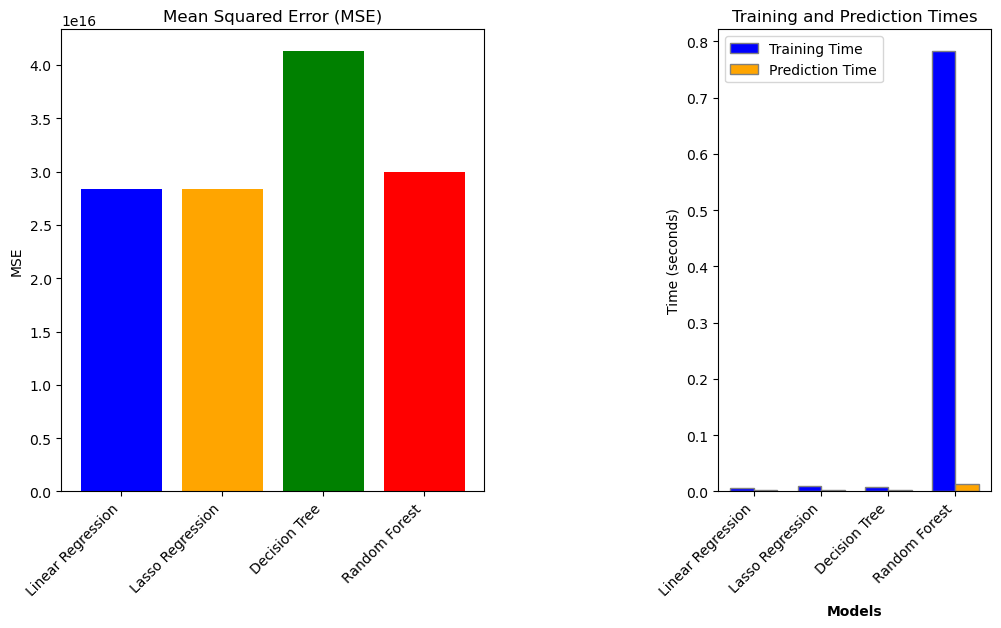

In [16]:
models = ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']
mse_values = [mse_linear, mse_lasso, mse_tree, mse_forest]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_values, color=['blue', 'orange', 'green', 'red'])
plt.title('Mean Squared Error (MSE)')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha='right')
# Plot 2: R-squared values
plt.subplot(1, 2, 2)
r2_values = [r2_linear, r2_lasso, r2_tree, r2_forest]
plt.bar(models, r2_values, color=['blue', 'orange', 'green', 'red'])
plt.title('R-squared (R2)')
plt.ylabel('R2')
plt.xticks(rotation=45, ha='right')
# Plot 3: Training and Prediction Times
plt.subplot(1, 3, 3)
barWidth = 0.35
r1 = np.arange(len(models))
training_times = [training_time_linear, training_time_lasso, training_time_tree, training_time_forest]
prediction_times = [prediction_time_linear, prediction_time_lasso, prediction_time_tree, prediction_time_forest]
plt.xticks(rotation=45, ha='right')
plt.bar(r1, training_times, color='blue', width=barWidth, edgecolor='grey', label='Training Time')
plt.bar(r1 + barWidth, prediction_times, color='orange', width=barWidth, edgecolor='grey', label='Prediction Time')
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + barWidth/2 for r in range(len(models))], models, rotation=45, ha='right')
plt.title('Training and Prediction Times')
plt.ylabel('Time (seconds)')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusion

**Your conclusion** In regression tasks, lower Mean Squared Error (MSE) values and higher R-squared (R2) values indicate better model performance, so Linear Regression and Lasso Regression are better than other.